Импортируем все необходимые библиотеки. 

In [1]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

Импортируем датасеты. 

In [2]:
data_1 = pd.read_csv('/Users/valeriaastahova/Desktop/Машинное обучение Нетология/Датасеты/Временные ряды/monthly-car-sales-in-quebec-1960.csv')
data_2 = pd.read_csv('/Users/valeriaastahova/Desktop/Машинное обучение Нетология/Датасеты/Временные ряды/monthly-sales-of-company-x-jan-6.csv')

In [3]:
vr_1 = data_1['Count']

In [4]:
vr_1

0       6550
1       8728
2      12026
3      14395
4      14587
       ...  
103    16722
104    14385
105    21342
106    17180
107    14577
Name: Count, Length: 108, dtype: int64

In [5]:
vr_2 = data_2['Count']

In [6]:
vr_2

0     154
1      96
2      73
3      49
4      36
     ... 
72    628
73    308
74    324
75    248
76    272
Name: Count, Length: 77, dtype: int64

Пропишем основные функции

In [7]:
def test_stationarity(timeseries): # функция, которая тестирует на стационарность
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [8]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'): # функция, которая рисует корреляцию и автокорреляцию
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# Работа с рядом vr_1

Проверим ряд на стационарность:

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


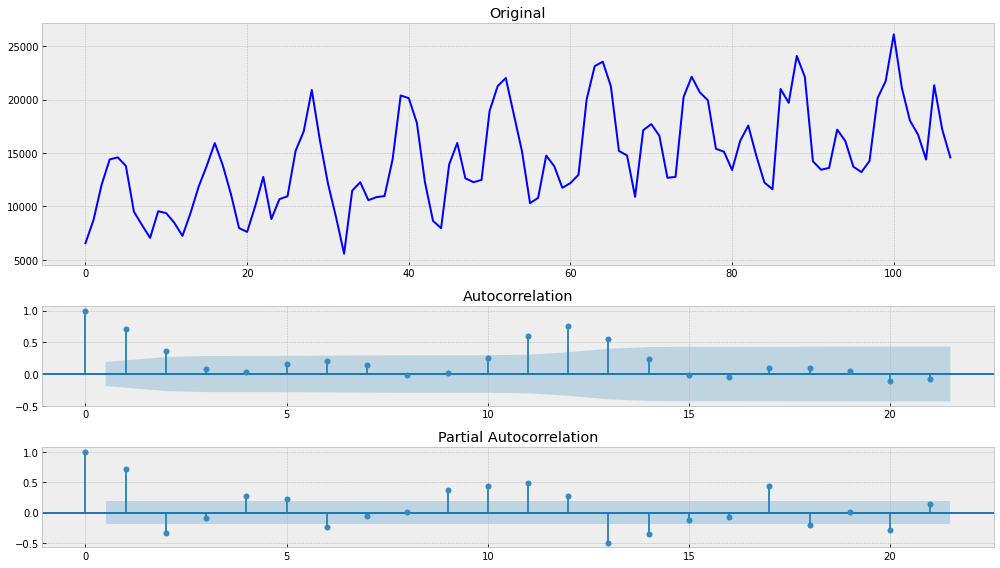

In [9]:
tsplot(vr_1)

Значение p-value в тесте на стационарность значительно больше 0.05, что не позволяет нам отбросить гипотезу о нестационарности ряда. Визуальная оценка также показывает, что у ряда есть тренд и выраженная сезонность. Также есть небольшое изменение дисперсии. С этого и начнем. 

Results of Dickey-Fuller Test:
Test Statistic                 -1.452425
p-value                         0.556901
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


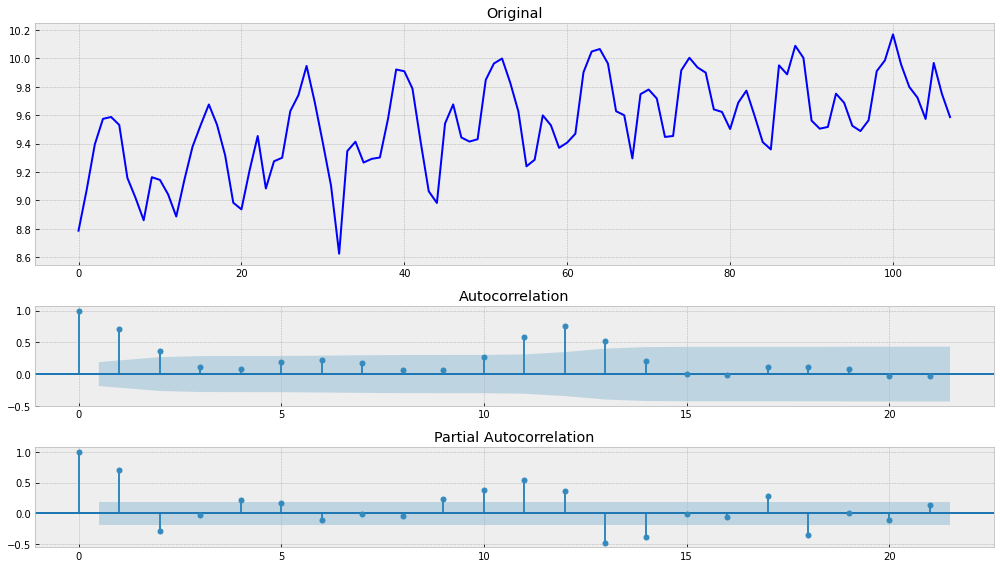

In [10]:
vr_new = boxcox(vr_1, 0)
tsplot(vr_new)

Избавимся от тренда с помощью дифференцирования. 

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


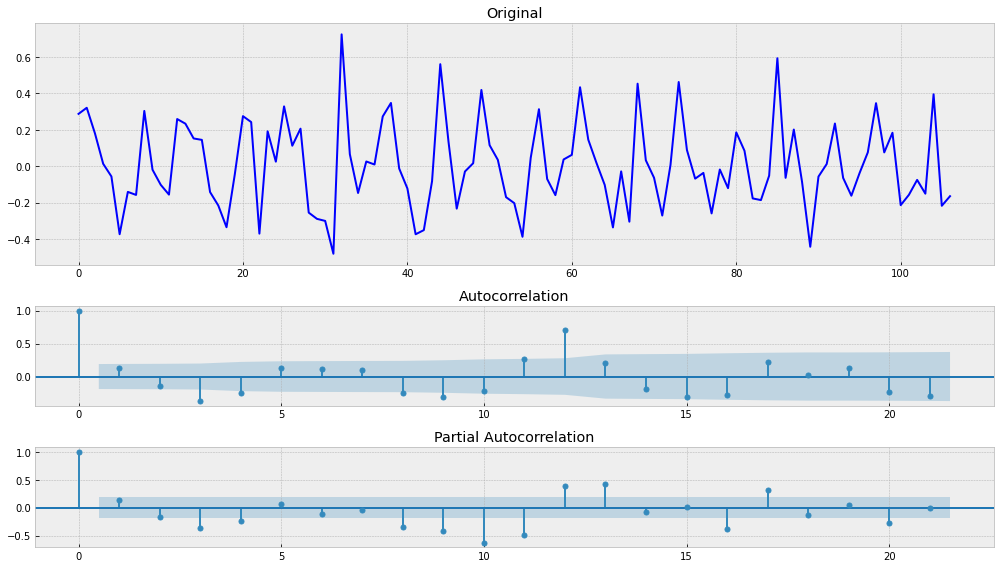

In [11]:
vr_new = np.diff(vr_new, 1)
tsplot(vr_new)

Теперь избавимся от сезонности. Попробуем сезонность, равную 6. 

Results of Dickey-Fuller Test:
Test Statistic                -7.060154e+00
p-value                        5.249080e-10
#Lags Used                     1.300000e+01
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


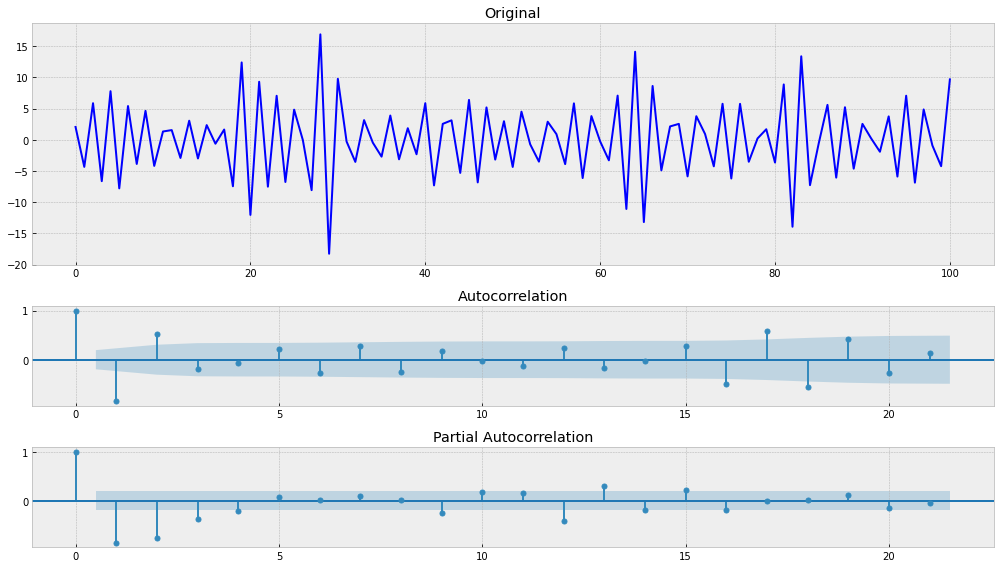

In [12]:
vr_new = np.diff(vr_new, 6)
tsplot(vr_new)

Попробуем обработать ряд без корректировки дисперсии. 

Results of Dickey-Fuller Test:
Test Statistic                -6.199799e+00
p-value                        5.844753e-08
#Lags Used                     1.100000e+01
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


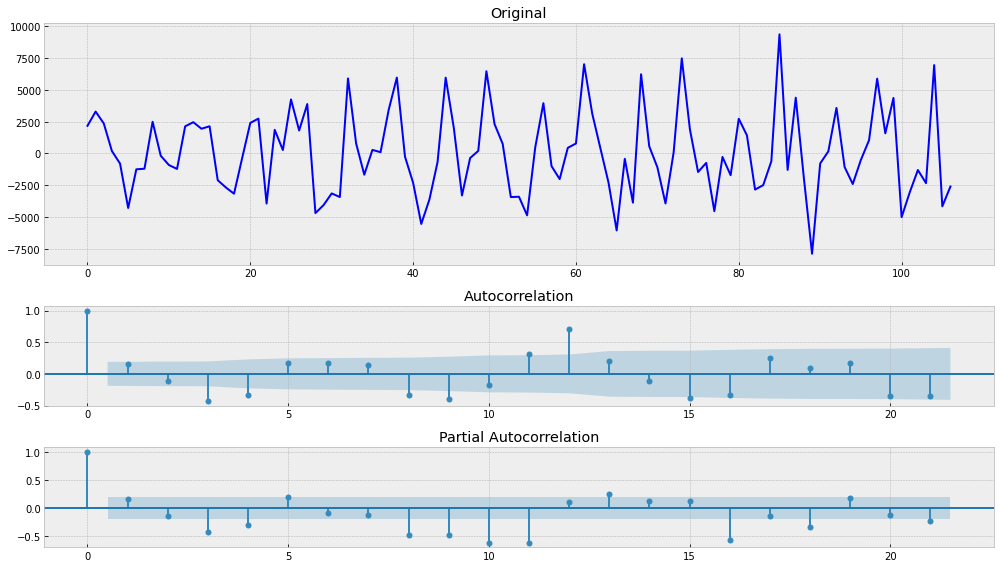

In [13]:
vr_new_1 = np.diff(vr_1, 1)
tsplot(vr_new_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.446215e+01
p-value                        6.819423e-27
#Lags Used                     1.100000e+01
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


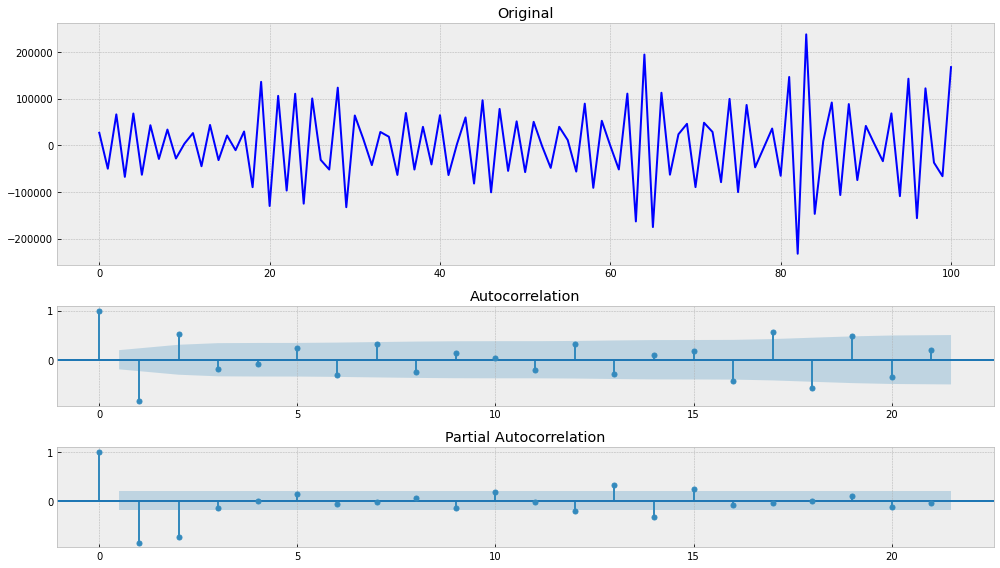

In [14]:
vr_new_1 = np.diff(vr_new_1, 6)
tsplot(vr_new_1)

В первом случае мы получили p-value =  5.249080e-10, во втором = 6.819423e-27. Второе значение лучше, но оба результата позволяют отвергнуть гипотезу о нестационарности ряда. 

# Работа с рядом vr_2

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/Users/valeriaastahova/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


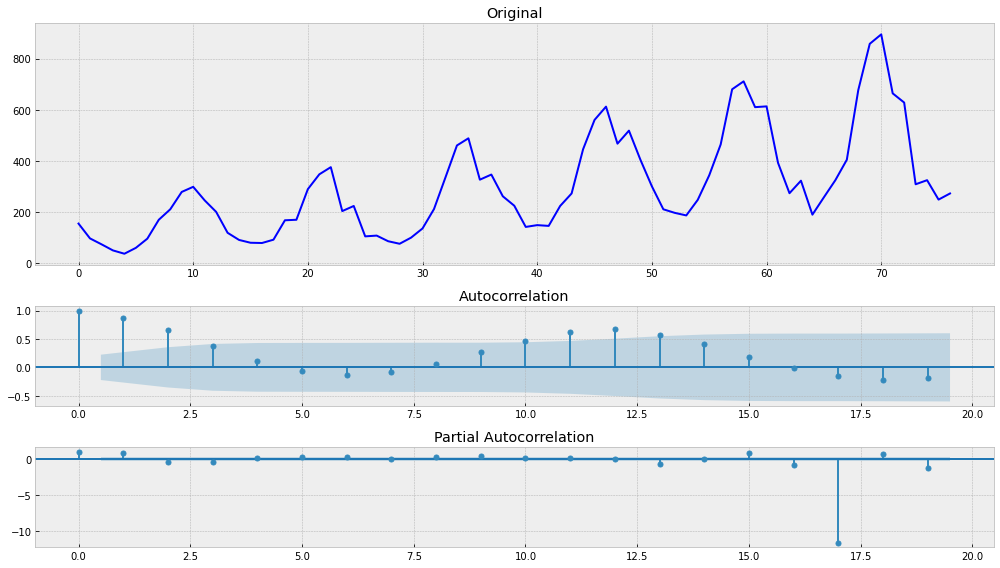

In [15]:
tsplot(vr_2)

У этого ряда выраженное увеличение дисперсии, сезонность и тренд. Будем избавляться. 

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/Users/valeriaastahova/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


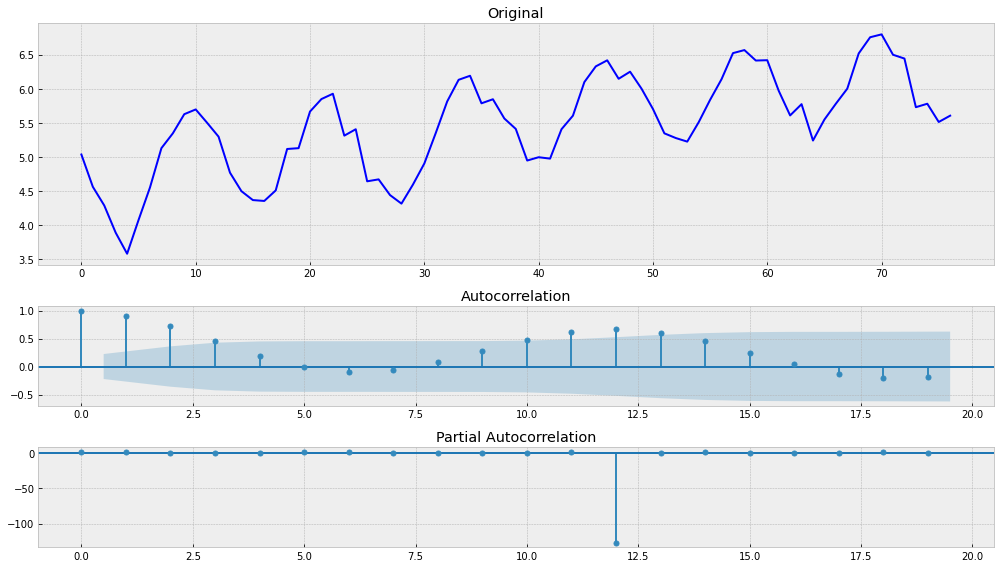

In [16]:
vr_2 = boxcox(vr_2, 0)
tsplot(vr_2)

Избавимся от тренда с помощью дифференцирования. 

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


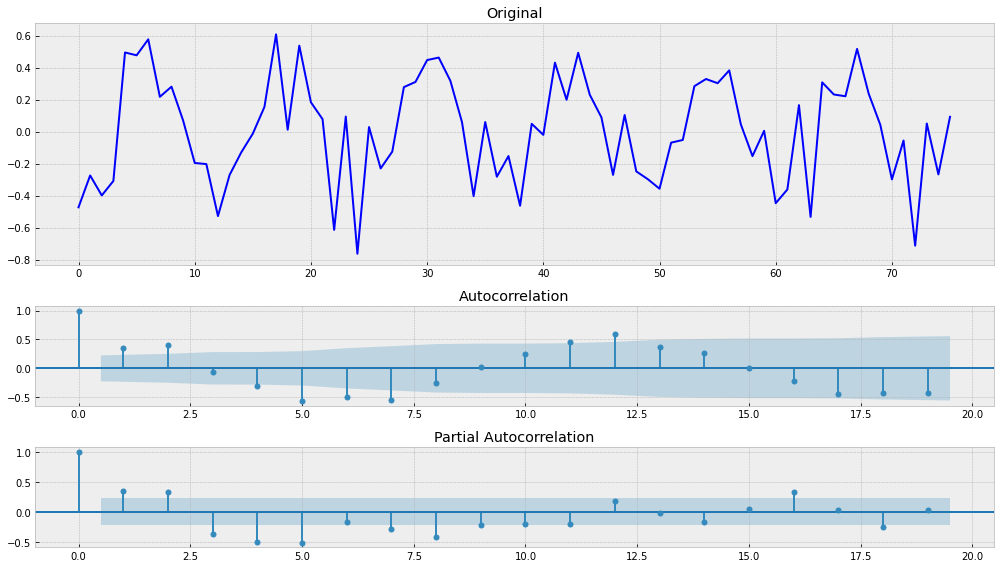

In [17]:
vr_2 = np.diff(vr_2, 1)
tsplot(vr_2)

Напоследок избавимся от сезонности. 

Results of Dickey-Fuller Test:
Test Statistic                -6.850387e+00
p-value                        1.700212e-09
#Lags Used                     1.100000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


/Users/valeriaastahova/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


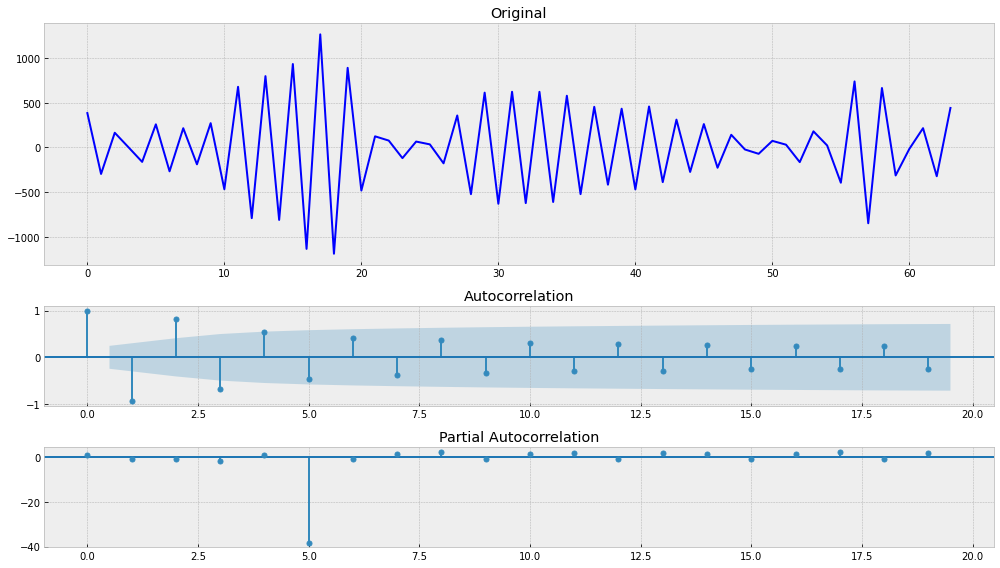

In [18]:
vr_2 = np.diff(vr_2, 12)
tsplot(vr_2)

Теперь ряд проходит проверку на стационарность, значение p-value = 1.700212e-09.